In [2]:
import splitfolders
import tensorflow as tf
from tensorflow.keras import Model
from keras.applications.mobilenet_v2 import MobileNetV2,preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import cv2
import scipy
from tensorflow.keras.preprocessing import image_dataset_from_directory 
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing import image

In [6]:
import os
os.mkdir('dataset_for_plant_village')

In [8]:
os.mkdir(os.path.join('dataset_for_plant_village','train'))
os.mkdir(os.path.join('dataset_for_plant_village','test'))
os.mkdir(os.path.join('dataset_for_plant_village','val'))

In [2]:
dataset_path = 'dataset/archive/plantvillage dataset/color'
splitfolders.ratio(dataset_path,output='dataset_for_plant_village',seed=42,ratio=(0.70,0.20,0.10))

KeyboardInterrupt: 

In [5]:
train_dataset_path = 'dataset_for_plant_village/train'
test_dataset_path = 'dataset_for_plant_village/test'
val_dataset_path = 'dataset_for_plant_village/val'

In [6]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(train_dataset_path,target_size=(224,224),batch_size=30)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(val_dataset_path,target_size=(224,224),batch_size=20)

test_gen = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(test_dataset_path,target_size=(224,224))

Found 37997 images belonging to 38 classes.
Found 10849 images belonging to 38 classes.
Found 5459 images belonging to 38 classes.


In [7]:
MobileNetV2_model = MobileNetV2(weights='imagenet',include_top=False)

x = MobileNetV2_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512,activation='relu')(x)
x = Dense(256,activation='relu')(x)
x = Dense(128,activation='relu')(x)
predictions = Dense(38,activation='softmax')(x)

model = Model(inputs=MobileNetV2_model.input,outputs=predictions)

C:\Users\user\AppData\Local\Temp\ipykernel_9524\3294822185.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  MobileNetV2_model = MobileNetV2(weights='imagenet',include_top=False)


In [8]:
for layers in model.layers[:-5]:
    layers.trainable = False

In [9]:
optimizers = Adam(learning_rate=0.0001)
epochs = 8
model.compile(loss='categorical_crossentropy',optimizer=optimizers,metrics=['accuracy'])

In [10]:
model.fit(train_gen,validation_data=val_gen,epochs=epochs)

Epoch 1/8


d:\ANACONDA\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 122/1267 ━━━━━━━━━━━━━━━━━━━━ 9:19 488ms/step - accuracy: 0.2663 - loss: 2.9922

KeyboardInterrupt: 

In [68]:
a = model.history['accuracy']
a

TypeError: 'History' object is not subscriptable

In [23]:
result = model.evaluate(test_gen)

171/171 [==============================] - 33s 187ms/step - loss: 0.1083 - accuracy: 0.9659


In [6]:
new_model = tf.keras.models.load_model('models/plant_village_model.h5')

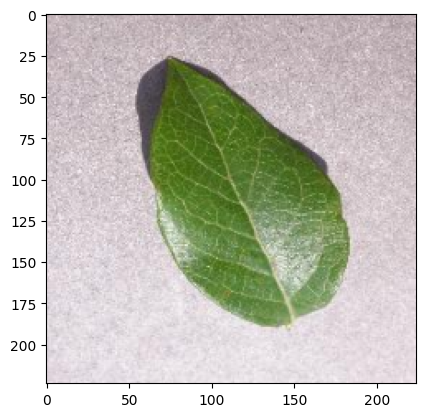

In [16]:
img = 'dataset_for_plant_village/test/Blueberry___healthy/0b344c16-456c-4085-aa61-6a1c4cb93632___RS_HL 2538.jpg'
a= cv2.imread(img)
inverted_img = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)

resized_img = cv2.resize(inverted_img,(224,224))
plt.imshow(resized_img)

In [ ]:
test_img = image.load_img(inverted_img,target_size=(224,224))

In [17]:

arr_img = image.img_to_array(resized_img)
arr_img = np.expand_dims(arr_img,axis=0)
arr_img /= 255.0

In [11]:
import os
labels = os.listdir('dataset_for_plant_village/test/')

In [18]:
predictions = new_model.predict(arr_img)
predicted_class = labels[np.argmax(predictions)]
print(predicted_class)

1/1 [==============================] - 0s 22ms/step
Blueberry___healthy


In [45]:
model.save('plant_village_model.h5')